<a href="https://colab.research.google.com/github/Ajay20645/ML-LAB/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MNIST Binary Classification (0 vs 1) using Neural Network + Confusion Matrix + Camera Input

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import cv2


In [2]:

# 1. Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Filter only digits 0 and 1
train_filter = np.where((y_train == 0) | (y_train == 1))
test_filter = np.where((y_test == 0) | (y_test == 1))

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# 3. Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# 4. Build binary classifier model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# 5. Train model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 6. Evaluate and predict
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()

acc = accuracy_score(y_test, y_pred_classes)
print(f"\nTest Accuracy: {acc * 100:.2f}%")



Epoch 1/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9838 - loss: 0.0551 - val_accuracy: 0.9992 - val_loss: 0.0015
Epoch 2/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9989 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 7.1938e-04
Epoch 3/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9991 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 1.7952e-04
Epoch 4/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 1.0000 - loss: 2.0249e-04 - val_accuracy: 1.0000 - val_loss: 3.4162e-05
Epoch 5/5
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 1.5196e-04 - val_accuracy: 1.0000 - val_loss: 1.4283e-05
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Test Accuracy: 99.95%


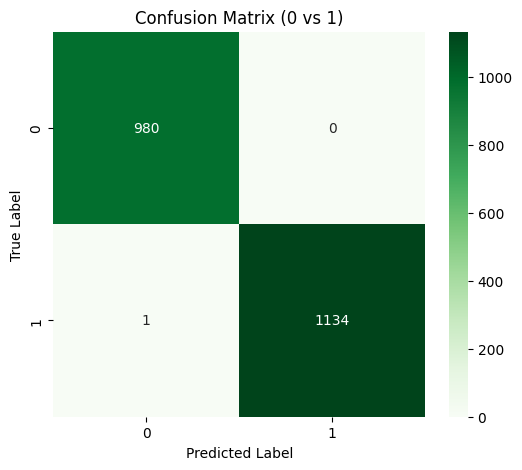

In [5]:
# 7. Confusion Matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (0 vs 1)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()





Number of misclassified images: 1


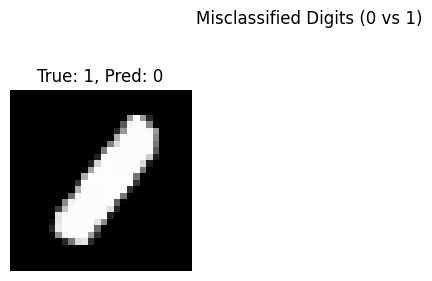

In [6]:
# 8. Misclassified images
misclassified_idx = np.where(y_pred_classes != y_test)[0]
print(f"\nNumber of misclassified images: {len(misclassified_idx)}")

plt.figure(figsize=(8, 8))
for i, idx in enumerate(misclassified_idx[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Digits (0 vs 1)")
plt.show()

model.save("mnist_binary_0_1_classifier.h5")